# Procesamiento de datos de Agricultores de la Amazonía ecuatoriana

Por: Daning Montaño Ocampo

Fecha: 22/06/2025

## 1.Librerías

In [28]:
library(dplyr) ## manejo de datos
library(ggplot2)  ## Generacion de gráficas
library(readxl) ## abrir archivos de excel
library(lubridate) ## manejo de fechas
library(psych) ## cor plot
library(factoextra) ## PCA

## 2. Carga de datos

In [29]:
df_agri = read_excel("Data/Informacion_agricultores.xlsx")%>%as.data.frame()
df_agri

         sexo nacionalidad fecha_nacimiento       estado_civil jefe_familia
1      hombre       kichwa       1979-08-21             Casado           Si
2       mujer       kichwa       1970-06-20           Separado           Si
3   sex_mujer   nac_kichwa       2003-04-26     estciv_soltero           no
4   sex_mujer   nac_kichwa       1977-10-19      estciv_casado           si
5   sex_mujer   nac_kichwa       1983-05-30     estciv_soltero           si
6   sex_mujer   nac_kichwa       1982-09-01      estciv_casado           no
7  sex_hombre   nac_kichwa       1970-06-21      estciv_casado           si
8   sex_mujer   nac_kichwa       1974-01-10      estciv_casado           no
9  sex_hombre   nac_kichwa       1988-03-19     estciv_soltero           si
10  sex_mujer   nac_kichwa       1991-11-12     estciv_soltero           si
11  sex_mujer   nac_kichwa       1999-07-29 estciv_union_libre           no
12 sex_hombre   nac_kichwa       1984-05-31      estciv_casado           si
13 sex_hombr

In [30]:
str(df_agri)

'data.frame':	580 obs. of  21 variables:
 $ sexo                           : chr  "hombre" "mujer" "sex_mujer" "sex_mujer" ...
 $ nacionalidad                   : chr  "kichwa" "kichwa" "nac_kichwa" "nac_kichwa" ...
 $ fecha_nacimiento               : chr  "1979-08-21" "1970-06-20" "2003-04-26" "1977-10-19" ...
 $ estado_civil                   : chr  "Casado" "Separado" "estciv_soltero" "estciv_casado" ...
 $ jefe_familia                   : chr  "Si" "Si" "no" "si" ...
 $ provincia                      : chr  "pro_pastaza" "pastaza" "pro_pastaza" "pro_pastaza" ...
 $ discapacidad                   : chr  "no" "No" "no" "no" ...
 $ educacion                      : chr  "edu_secundaria" "primaria" "edu_secundaria" "edu_primaria" ...
 $ ingreso_mensual                : chr  "200" "10" "10" "200" ...
 $ bono                           : chr  "No" "Si" "si" "si" ...
 $ bono_cuanto                    : chr  NA "55" "0" "74" ...
 $ numero_mujeres                 : chr  NA "3" NA "3" ...
 $ n

## 3. Limpieza de datos

In [31]:
df_agri = df_agri %>%
  ## Cambiar categorías de Sexo
  mutate(sexo = case_when( 
    sexo == "sex_mujer" ~ "Mujer",
    sexo == "sex_hombre" ~ "Hombre",
    sexo == "hombre" ~ "Hombre",
    sexo == "mujer" ~ "Mujer",
    TRUE ~ sexo  
  ))  %>%
  
  ## Cambiar categoría de Nacionalidad
  mutate(nacionalidad = case_when( 
    nacionalidad == "kichwa" ~ "Kichwa",
    nacionalidad == "nac_kichwa" ~ "Kichwa",
    nacionalidad == "nac_woarani" ~ "Woarani",
    nacionalidad == "nac_shuar" ~ "Shuar",
    nacionalidad == "nac_mestizo" ~ "Mestizo",
    nacionalidad == "nac_sapara" ~ "Sapara",
    nacionalidad == "nac_otra" ~ "Otra",
    TRUE ~ nacionalidad  
  )) %>%
  
  ## Crear variable Edad
  mutate(edad = as.integer(floor(interval(fecha_nacimiento, today()) / years(1))))%>%
  
  ## Cambia categirías de estado civil 

  mutate(estado_civil = case_when( 
    estado_civil == "estciv_soltero" ~ "Soltero",
    estado_civil == "estciv_casado" ~ "Casado",
    estado_civil == "estciv_union_libre" ~ "Unión libre",
    estado_civil == "estciv_divorciado" ~ "Separado",
    estado_civil == "estciv_viudo" ~ "Viudo",
    estado_civil == "estciv_separado" ~ "Separado",
    estado_civil == "NA" ~ "Soltero",
    TRUE ~ estado_civil  
  )) %>%
  
  ## Cambia categorías Educacion
  mutate(educacion = case_when( 
    educacion == "edu_secundaria" ~ "Secundaria",
    educacion == "primaria" ~ "Primaria",
    educacion == "edu_primaria" ~ "Primaria",
    educacion == "edu_tercer_nivel" ~ "Tercer nivel",
    educacion == "edu_inicial" ~ "Educación inicial",
    educacion == "edu_cuarto_nivel" ~ "Cuarto nivel",
    educacion == "edu_analfabeto" ~ "Analfabeto",
    TRUE ~ educacion  
  ))%>%
  
  
  ## Cambia categorías Educacion
  mutate(bono = case_when( 
    bono == "si" ~ "Si",
    bono == "no" ~ "No",
    TRUE ~ bono  
  ))%>%
  

  ## Rellena de 0 las observaciones con NA en la variable Cuanto de Bono
  
  mutate(bono_cuanto = if_else(is.na(as.numeric(bono_cuanto)), 0, as.numeric(bono_cuanto)))%>%
  
  ## Total de horas de trabajo al mes

  mutate(total_horas_mensual = if_else(
    is.na(as.numeric(diastrabajo_sistemaagroforestal)) | is.na(as.numeric(horatrabajo_sistemaagroforestal)),
    0,
    as.numeric(diastrabajo_sistemaagroforestal) * as.numeric(horatrabajo_sistemaagroforestal)
  ))%>%
  
  ## Rellena de 0 las observaciones con NA en la variable financiamiento_deuda, que significa que se endeudaría por un crédito para producción
  
  mutate(financiamiento_deuda  = if_else(is.na(financiamiento_deuda ),"no", financiamiento_deuda ))%>%
  
  ## Rellena de 0 las observaciones con NA en la fin_monto, uw significa por cuanto se endeudaría
  
  mutate(fin_monto = if_else(is.na(as.numeric(fin_monto)), 0, as.numeric(fin_monto)))%>%
  
  mutate(ingreso_mensual = as.numeric(ingreso_mensual))%>%
  
  mutate(diastrabajo_sistemaagroforestal = as.numeric(diastrabajo_sistemaagroforestal))%>%
  
  mutate(horatrabajo_sistemaagroforestal = as.numeric(horatrabajo_sistemaagroforestal))%>%
  
  mutate(gasto_sistemaagroforestal = as.numeric(gasto_sistemaagroforestal))%>%
  mutate( financiamiento_deuda = as.factor( financiamiento_deuda))%>%
  mutate(sexo = as.factor(sexo))%>%
  mutate(financiamiento_deuda  = as.factor(financiamiento_deuda ))%>%
  mutate(bono  = as.factor(bono ))
  

  

df_agri

     sexo nacionalidad fecha_nacimiento estado_civil jefe_familia   provincia
1  Hombre       Kichwa       1979-08-21       Casado           Si pro_pastaza
2   Mujer       Kichwa       1970-06-20     Separado           Si     pastaza
3   Mujer       Kichwa       2003-04-26      Soltero           no pro_pastaza
4   Mujer       Kichwa       1977-10-19       Casado           si pro_pastaza
5   Mujer       Kichwa       1983-05-30      Soltero           si pro_pastaza
6   Mujer       Kichwa       1982-09-01       Casado           no pro_pastaza
7  Hombre       Kichwa       1970-06-21       Casado           si pro_pastaza
8   Mujer       Kichwa       1974-01-10       Casado           no pro_pastaza
9  Hombre       Kichwa       1988-03-19      Soltero           si pro_pastaza
10  Mujer       Kichwa       1991-11-12      Soltero           si pro_pastaza
11  Mujer       Kichwa       1999-07-29  Unión libre           no pro_pastaza
12 Hombre       Kichwa       1984-05-31       Casado           s

## 4. Análisis Exploratorio de datos (EDA)

Nuestra Variable de interés es saber las variables que inbfluencian en la intención de acceder a un crédito verde. financiamiento_deuda, tiene Si cuando el agricultor quiere acceder a un crédito, y No cuando no tiene la intención.

Para practicidad trabajaremos solo con datos completos y seleccionaremos solo ciertas variables, de las cuales se intuye que existe alguna relación con la variable objetivo

In [32]:
df_agri = df_agri %>% dplyr::select(sexo, ingreso_mensual,  bono_cuanto, diastrabajo_sistemaagroforestal,horatrabajo_sistemaagroforestal, gasto_sistemaagroforestal,financiamiento_deuda,edad, fin_monto )

In [33]:
df_agri = na.omit(df_agri)

### 4.1. Tamaño dataset

In [34]:
dim(df_agri) ## filas y columnas

[1] 570   9

### 4.2. Tipo de variables

In [35]:
str(df_agri)

'data.frame':	570 obs. of  9 variables:
 $ sexo                           : Factor w/ 2 levels "Hombre","Mujer": 1 2 2 2 2 1 2 1 2 2 ...
 $ ingreso_mensual                : num  200 10 200 250 100 70 60 500 40 50 ...
 $ bono_cuanto                    : num  0 0 74 79 50 0 50 0 0 80 ...
 $ diastrabajo_sistemaagroforestal: num  5 2 2 2 5 4 4 2 2 2 ...
 $ horatrabajo_sistemaagroforestal: num  4 4 8 8 4 8 5 3 5 3 ...
 $ gasto_sistemaagroforestal      : num  400 80 120 50 160 240 130 80 100 100 ...
 $ financiamiento_deuda           : Factor w/ 2 levels "no","si": 2 1 2 2 2 2 2 2 2 1 ...
 $ edad                           : int  45 22 47 42 42 54 51 37 33 25 ...
 $ fin_monto                      : num  300 0 2000 2000 1000 500 500 1000 1000 0 ...
 - attr(*, "na.action")= 'omit' Named int [1:10] 2 32 64 93 168 169 256 311 464 571
  ..- attr(*, "names")= chr [1:10] "2" "32" "64" "93" ...


### 4.3. Descripción de variables

In [36]:
summary(df_agri)

     sexo     ingreso_mensual   bono_cuanto     diastrabajo_sistemaagroforestal
 Hombre: 96   Min.   :   0.0   Min.   :  0.00   Min.   :0.000                  
 Mujer :474   1st Qu.:  30.0   1st Qu.:  0.00   1st Qu.:2.000                  
              Median :  50.0   Median : 50.00   Median :3.000                  
              Mean   : 108.3   Mean   : 38.69   Mean   :3.414                  
              3rd Qu.: 100.0   3rd Qu.: 65.00   3rd Qu.:5.000                  
              Max.   :1530.0   Max.   :240.00   Max.   :7.000                  
 horatrabajo_sistemaagroforestal gasto_sistemaagroforestal financiamiento_deuda
 Min.   : 0.00                   Min.   :  0.0             no:249              
 1st Qu.: 4.00                   1st Qu.: 60.0             si:321              
 Median : 4.00                   Median :120.0                                 
 Mean   : 4.84                   Mean   :125.3                                 
 3rd Qu.: 6.00                   3rd Qu.

### 4.4. Gráfico de variables de interés

Edades por Género

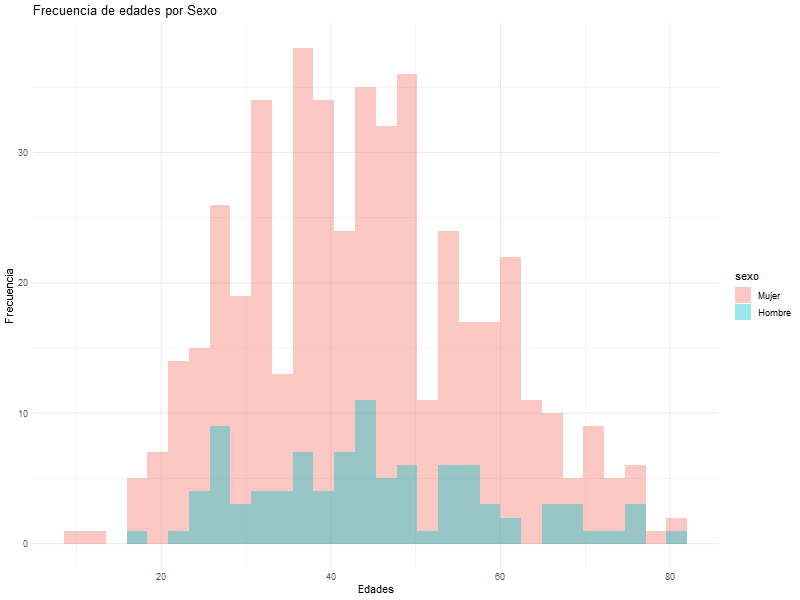

In [37]:
# Asegura el orden de los factores: Mujer primero, Hombre después
df_agri$sexo <- factor(df_agri$sexo, levels = c("Mujer", "Hombre"))

# Gráfico
hist_by_sex = ggplot(df_agri, aes(x = edad, fill = sexo)) +
  geom_histogram(alpha = 0.4, position = "identity", bins = 30) +
  xlab("Edades") +
  ylab("Frecuencia") +
  ggtitle("Frecuencia de edades por Sexo")+
    theme_minimal()
print(hist_by_sex)


In [38]:
ggsave("Resultados/hist_edad_by_sex.png", plot = hist_by_sex,width = 5, height = 4, dpi = 300)

In [39]:
df_agri%>%group_by(sexo)%>%
  summarise(conteo = n())

# A tibble: 2 × 2
  sexo   conteo
  <fct>   <int>
1 Mujer     474
2 Hombre     96

In [40]:
df_agri%>%group_by(sexo)%>%
  summarise(promedio = mean(edad))

# A tibble: 2 × 2
  sexo   promedio
  <fct>     <dbl>
1 Mujer      43.8
2 Hombre     45.0

### 4.5. Cuantos Personas desearían acceder a un crédito verde 

In [41]:
df_agri %>%
  group_by(financiamiento_deuda) %>%
  summarise(conteo = n()) 

# A tibble: 2 × 2
  financiamiento_deuda conteo
  <fct>                 <int>
1 no                      249
2 si                      321

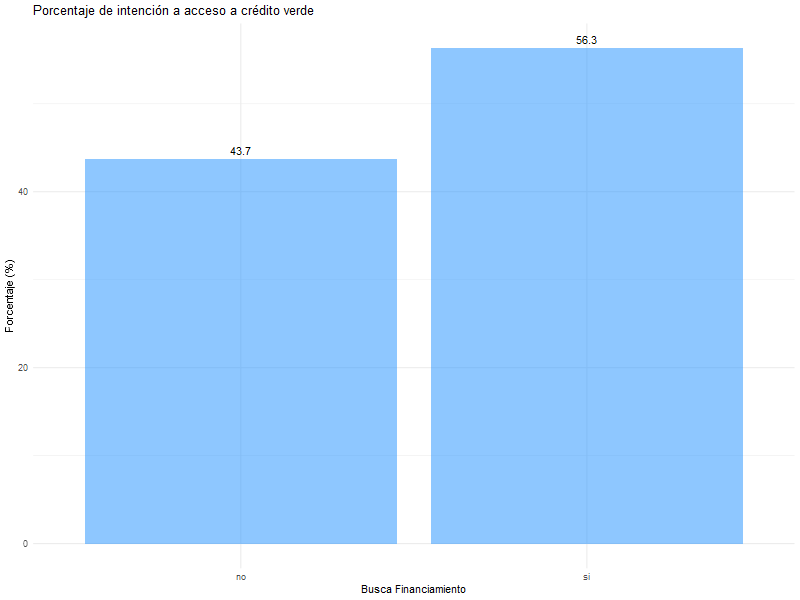

In [42]:
barplot_acceso_creditos= df_agri %>%
  group_by(financiamiento_deuda) %>%
  summarise(conteo = n()) %>%
  mutate(Porcentaje = (conteo / sum(conteo)) * 100) %>%
  ggplot(aes(x = financiamiento_deuda, y = Porcentaje)) +
  geom_bar(stat = "identity", fill = "#1E90FF", alpha = 0.5) +
  geom_text(aes(label = round(Porcentaje, 1)), vjust = -0.5, size = 4) +
  xlab("Busca Financiamiento") +
  ylab("Porcentaje (%)") +
  ggtitle("Porcentaje de intención a acceso a crédito verde") +
  theme_minimal()

print(barplot_acceso_creditos)


In [43]:
ggsave("Resultados/barplot_acceso_creditos.png", plot = barplot_acceso_creditos ,width = 5, height = 5, dpi = 300)

### 4.6. Plot de correlación de variables categóricas

In [44]:
variables_continuas <- df_agri %>% dplyr::select(-sexo, -financiamiento_deuda, - fin_monto)  
cor(scale(variables_continuas))

                                ingreso_mensual bono_cuanto
ingreso_mensual                      1.00000000 -0.23016846
bono_cuanto                         -0.23016846  1.00000000
diastrabajo_sistemaagroforestal     -0.07646897  0.07593215
horatrabajo_sistemaagroforestal      0.14857781 -0.10256546
gasto_sistemaagroforestal            0.08869947 -0.05004502
edad                                 0.04075423  0.18197022
                                diastrabajo_sistemaagroforestal
ingreso_mensual                                     -0.07646897
bono_cuanto                                          0.07593215
diastrabajo_sistemaagroforestal                      1.00000000
horatrabajo_sistemaagroforestal                     -0.13614469
gasto_sistemaagroforestal                            0.51004700
edad                                                 0.17133673
                                horatrabajo_sistemaagroforestal
ingreso_mensual                                      0.14857781
bono

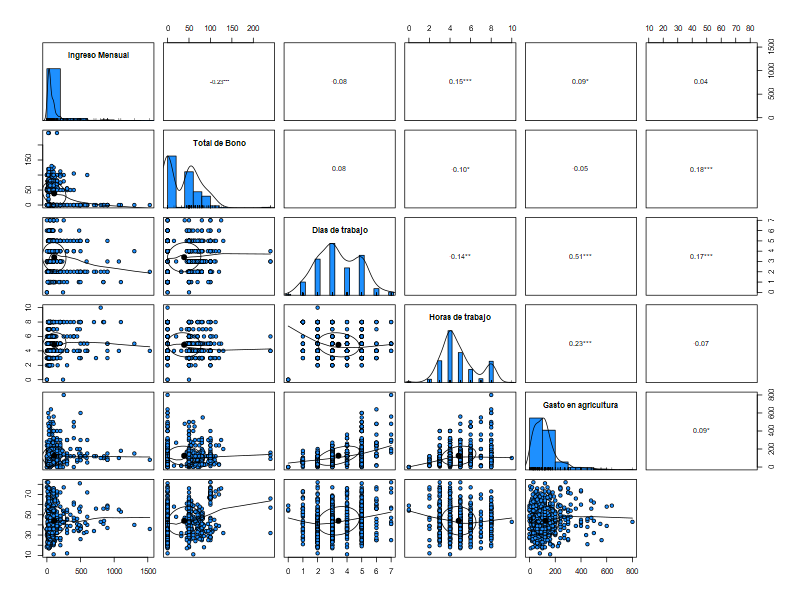

In [45]:


# Graficar con control visual
pairs.panels(
  variables_continuas,     # tu dataframe
  labels = c("Ingreso Mensual", "Total de Bono", "Dias de trabajo", "Horas de trabajo", "Gasto en agricultura", "Edad", "Horas mensual"),
  method = "pearson",   # método de correlación
  smooth = TRUE,        # curva loess
  lm = FALSE,           # sin línea lineal
  density = TRUE,       # incluye densidad/histograma
  ellipses = TRUE,      # elipses de correlación
  pch = 21,             # tipo de punto
  col = "black",  # borde de punto
  bg = "#1E90FF",   # relleno de punto
  digits = 2,           # decimales
  cor = TRUE,           # mostrar correlación
  scale = FALSE,        # no escalar texto por tamaño
  rug = TRUE,           # mini barras bajo histograma
  hist.col = "#1E90FF",
  show.points = TRUE,
  breaks = 10,
  smoother = FALSE,
  stars = TRUE,         # mostrar significancia (*, **, ***)
  ci = FALSE,           # sin intervalos de confianza
  cex.labels = 1,     # texto de nombres de variables
  font.labels = 2,      # texto en negrita
  cex.cor = 1.5         # tamaño de números de correlación
)

### 4.7. PCA

Se hace un PCA para entender como se relacionan las diferentes variables con la intencion de acceder o no a un crédito verde

In [46]:
colnames(df_agri)

[1] "sexo"                            "ingreso_mensual"                
[3] "bono_cuanto"                     "diastrabajo_sistemaagroforestal"
[5] "horatrabajo_sistemaagroforestal" "gasto_sistemaagroforestal"      
[7] "financiamiento_deuda"            "edad"                           
[9] "fin_monto"                      

In [47]:
df_agri$sexo <- recode(df_agri$sexo,
  "Hombre" = 1,
  "Mujer" = 0)
head(df_agri)

  sexo ingreso_mensual bono_cuanto diastrabajo_sistemaagroforestal
1    1             200           0                               5
3    0              10           0                               2
4    0             200          74                               2
5    0             250          79                               2
6    0             100          50                               5
7    1              70           0                               4
  horatrabajo_sistemaagroforestal gasto_sistemaagroforestal
1                               4                       400
3                               4                        80
4                               8                       120
5                               8                        50
6                               4                       160
7                               8                       240
  financiamiento_deuda edad fin_monto
1                   si   45       300
3                   no   22        

Escalamos los datos, ya que es necesario para hacer el PCA

In [48]:
variables_seleccion_pca = df_agri%>% dplyr::select(- fin_monto, - financiamiento_deuda)
str(variables_seleccion_pca)

'data.frame':	570 obs. of  7 variables:
 $ sexo                           : num  1 0 0 0 0 1 0 1 0 0 ...
 $ ingreso_mensual                : num  200 10 200 250 100 70 60 500 40 50 ...
 $ bono_cuanto                    : num  0 0 74 79 50 0 50 0 0 80 ...
 $ diastrabajo_sistemaagroforestal: num  5 2 2 2 5 4 4 2 2 2 ...
 $ horatrabajo_sistemaagroforestal: num  4 4 8 8 4 8 5 3 5 3 ...
 $ gasto_sistemaagroforestal      : num  400 80 120 50 160 240 130 80 100 100 ...
 $ edad                           : int  45 22 47 42 42 54 51 37 33 25 ...
 - attr(*, "na.action")= 'omit' Named int [1:10] 2 32 64 93 168 169 256 311 464 571
  ..- attr(*, "names")= chr [1:10] "2" "32" "64" "93" ...


In [49]:
pca_normalized = scale(na.omit(variables_seleccion_pca))

Calculamos el PCA con los datos normalizados

In [50]:
pca_results <- princomp(pca_normalized)
summary(pca_results)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4    Comp.5
Standard deviation     1.2707948 1.2562593 1.0261719 0.9835633 0.8691603
Proportion of Variance 0.2311082 0.2258516 0.1506971 0.1384424 0.1081096
Cumulative Proportion  0.2311082 0.4569598 0.6076569 0.7460993 0.8542089
                           Comp.6     Comp.7
Standard deviation     0.80436668 0.60970612
Proportion of Variance 0.09259184 0.05319927
Cumulative Proportion  0.94680073 1.00000000

In [51]:
pca_results$loadings[, 1:5]

                                     Comp.1      Comp.2       Comp.3
sexo                             0.47552477  0.08350707  0.414108305
ingreso_mensual                  0.48968657  0.12146847  0.313814126
bono_cuanto                     -0.48256888 -0.24703960  0.001976663
diastrabajo_sistemaagroforestal  0.07880603 -0.67315283 -0.012889070
horatrabajo_sistemaagroforestal  0.39757563  0.05984362 -0.512879242
gasto_sistemaagroforestal        0.36549295 -0.57466529 -0.298639677
edad                            -0.05786753 -0.36095324  0.614519485
                                     Comp.4      Comp.5
sexo                             0.15535412  0.67135882
ingreso_mensual                 -0.23285897 -0.67889724
bono_cuanto                     -0.46096031  0.12018508
diastrabajo_sistemaagroforestal  0.33853557 -0.05688547
horatrabajo_sistemaagroforestal -0.60565940  0.24950677
gasto_sistemaagroforestal        0.01154076 -0.05239686
edad                            -0.47706873  0.07547454

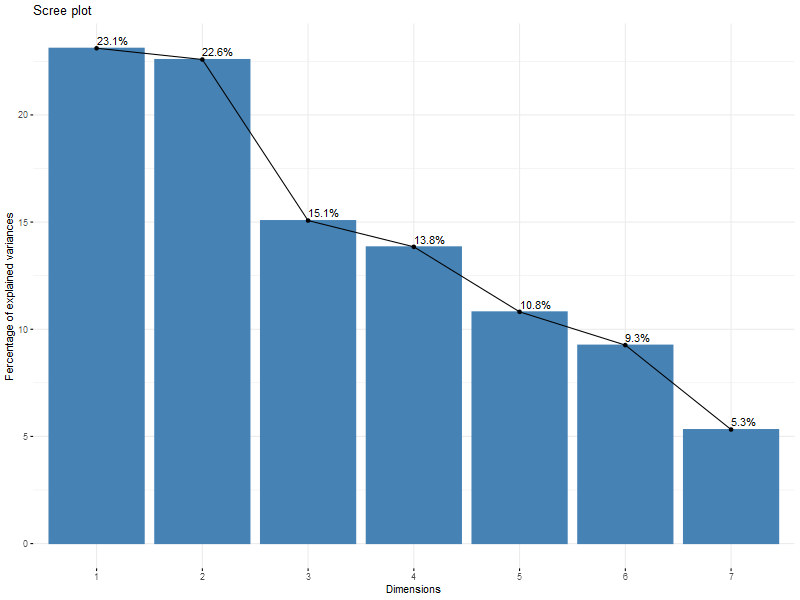

In [52]:
fviz_eig(pca_results, addlabels = TRUE)

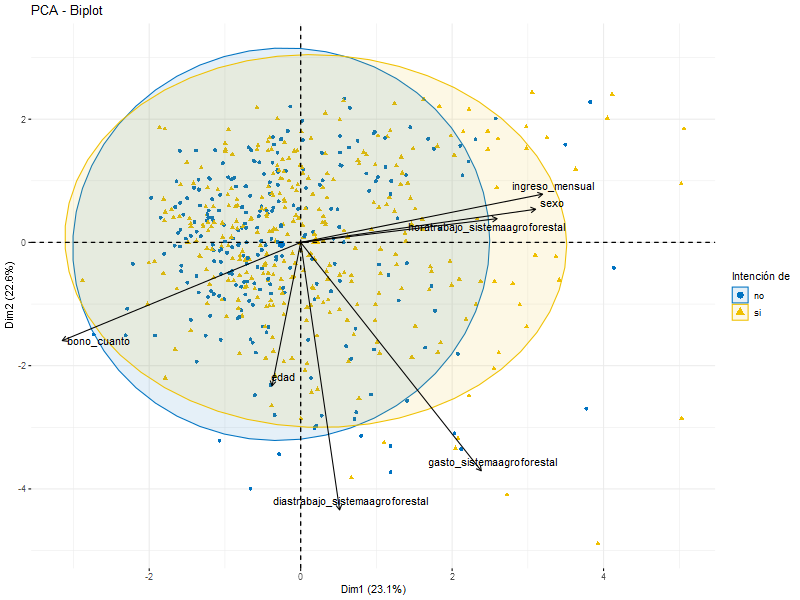

In [53]:
pca_plot = fviz_pca_biplot(pca_results, 
  col.ind = df_agri$financiamiento_deuda, palette = "jco", 
  addEllipses = TRUE, label = "var",
  col.var = "black", repel = TRUE,
  legend.title = "Intención de") 

print(pca_plot)

In [55]:
ggsave("Resultados/pca_acceso_creditos.png", plot = pca_plot ,width = 6, height = 5, dpi = 300)